# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Tasklist 11 Solutions: Conditional Probability. Multivariate Random Variables. Bias and Variance.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### Intro 

The goal of this Tasklist is to consolidate Probability Theory formulas and concepts we talked about in Session11 by applying appropriate functions, calculations and visualizations in Python. Good luck!

**01.** *Multinomial Distribution* is the generalization of the Binomial Distribution - it is used for experiments having three or more different outcomes, and it is used to calculate probabilities for a given count of these outcomes, in a given number of repetitions of the experiment. 

You are given two urns $A$ and $B$. Urn $A$ cotains blue, red and white balls in proportion of 8:1:1, while for urn $B$ they are in proportion 6:3:1. 

$$\$$

**a)** What's the probability of drawing 5 blue, 3 red and one white ball from urn $A$? What's the probability of drawing the same count of balls from urn $B$.

*Hint:* Use `multinomial` from `scipy.stats` to solve this. The parameters for `multinomial` are `n` - number of repetitions of the experiment (i.e. the number of balls drawn) and `p` - a list of prpobabilities for each outcome (i.e. a probability for a ball of certain colour to be drawn from an urn).

In [1]:
import scipy.stats
from scipy.stats import multinomial

In [2]:
#the probability for urn A
p_A = multinomial.pmf(x=[5, 3, 1], n=9, p=[.8, .1, .1])
p_A

0.016515072000000023

In [3]:
#the probability for urn B
p_B = multinomial.pmf(x=[5, 3, 1], n=9, p=[.6, .3, .1])
p_B

0.10581580799999993

**b)** You are given an unfair coin with probabilities of landing head/tails given by:

$$C:
\begin{pmatrix}
H & T\\
0.65 & 0.35
\end{pmatrix}
$$.

You toss this coin and draw 10 (**here should be 9!**) balls from an urn. If you land heads you draw from urn $A$, and if you land tails, you draw from urn $B$. Using Law of Total Probability, calculate the probability to draw 5 blue, 3 red and one white ball, regardless of the urn you drew from.

*Hint:* Use the probabilities calculated above as conditional probabilities of the form $P(X; \theta)$, where $X$ is the outcome and $\theta$ parameters of Multinomial Distribution.

$$P(X) = P(X|\ {\rm urn}\ A)P(H) + P(X|\ {\rm urn}\ B)P(T).$$

In [4]:
p_X = p_A*.65 + p_B*.35
p_X

0.04777032959999999

**c)** Using Bayes' Theorem calculate the probability that the result of drawing 5 blue, 3 red and one white ball comes from urn $B$.

$$P({\rm urn}\ B\ |X) = \frac{P(X|\ {\rm urn}\ B)P(T)}{P(X)}.$$

In [5]:
(p_B*.35)/p_X

0.7752831749354306

**02.**

Assume that in a population height is distributed according to the Normal Distribution. For male part of the population this distribution is $\mathcal{N}(182, 100)$ and for female is $\mathcal{N}(167, 121)$. 

$$\$$

**a)** What's the likelihood that the member of the population higher than 175cm is male? What about female?

$$\mathcal{L}(M|X\geqslant 175) = P(X\geqslant 175| M).$$
$$\mathcal{L}(F|X\geqslant 175) = P(X\geqslant 175| F).$$

In [6]:
from scipy.stats import norm

In [7]:
#for male
p_m = 1 - norm.cdf(x=175, loc=182, scale=10)
p_m

0.758036347776927

In [8]:
#for female
p_f = 1 - norm.cdf(x=175, loc=167, scale=11)
p_f

0.2335294508575867

**b)** What's the probability that a given member of the population is higher than 175cm, regardless of the gender? To calculate this, we assume that the population has the same number of male and female members.

$$P(X\geqslant 175) = P(X\geqslant 175|M)P(M) + P(X\geqslant 175|F)P(F).$$

In [9]:
p_x = p_m*.5 + p_f*.5
p_x

0.49578289931725683

**c)** What's the probability that the member of the population is female if they're higher than 175cm?

$$P(F|X\geqslant 175) = \frac{P(X\geqslant 175|F)P(F)}{P(X\geqslant 175)}.$$

In [10]:
(p_f*.5)/p_x

0.23551583886735541

**03.** A product is presented to people from Belgrade and Niš. In Niš product is bought by 531 person younger than 30, and 142 people aged 30 and older. As for Belgrade, 1 672 people younger than 30 bought the product, and 1 049 aged 30 and older. 

$$\$$

**a)** Using Pandas `pivot_table()` function and the data above, create a contingency table for bivarate random variable showing probabilities of a person buying the product from a given city-age group. What's the probability of a 33-year old person from Belgrade buying the product?

In [11]:
import pandas as pd

df = pd.DataFrame()
df['City'] = ['Niš', 'Niš', 'Belgrade', 'Belgrade']
df['Age'] = ['<30', '>=30', '<30', '>=30']
df['Counts'] = [531, 142, 1672, 1049]

pivo = df.pivot_table(index='City', columns='Age', values='Counts')
pivo

Age,<30,>=30
City,,
Belgrade,1672,1049
Niš,531,142


In [12]:
probs = pivo/df['Counts'].sum()
probs

Age,<30,>=30
City,,
Belgrade,0.492634,0.309075
Niš,0.156453,0.041839


In [13]:
print('The probability that a 33-year old person from Belgrade buys the product is 30.91%.')

The probability that a 33-year old person from Belgrade buys the product is 30.91%.


**b)** Use `margins` argument in the `pivot_table()` function to calculate the corresponding marginal probabilities. What's the probability of person from Niš buying the product?

In [14]:
probs_marg = df.pivot_table(index='City', columns='Age', values='Counts', margins=True, aggfunc='sum')/df['Counts'].sum()
probs_marg

Age,<30,>=30,All
City,,,
Belgrade,0.492634,0.309075,0.801709
Niš,0.156453,0.041839,0.198291
All,0.649087,0.350913,1.000000


In [15]:
print('The probability that a person from Niš buys the product is 19.83%.')

The probability that a person from Niš buys the product is 19.83%.


**04.** Two random variables are normally distributed with $X\sim\mathcal{N}(2, 25)$ and $Y\sim\mathcal{N}(-1, 16)$. 

$$\$$

**a)** RV $(X, Y)$ has Bivariate Normal Distribution $\mathcal{N}(\boldsymbol\mu, \Sigma)$. Assuming that the correlation between those RVs $X$ and $Y$ is -0.6, define Numpy arrays for mean vector $\boldsymbol\mu$ and covariance matrix $\Sigma$.

In [16]:
import numpy as np

#mean vector
mu = np.array([2, -1])
mu

array([ 2, -1])

In [17]:
#covariance matrix
sigma = np.array([[25, -.6*5*4], [-.6*5*4, 16]])
sigma

array([[ 25., -12.],
       [-12.,  16.]])

**b)** Using either Numpy or Scipy draw a sample from $\mathcal{N}(\boldsymbol\mu, \Sigma)$ of size 1000; use `jointplot()` from Seaborn to display how the sample points are distributed in 2D space, along with histograms of marginal distributions.

In [18]:
from scipy.stats import multivariate_normal

sample = multivariate_normal.rvs(mean=mu, cov=sigma, size=1000)
sample

array([[ 3.81591836,  0.6915325 ],
       [ 3.76969468,  0.96921105],
       [-7.34242168,  5.84368398],
       ...,
       [ 8.10615995, -5.10972997],
       [-0.68539881,  0.16545933],
       [ 9.67700303, -3.67115112]])

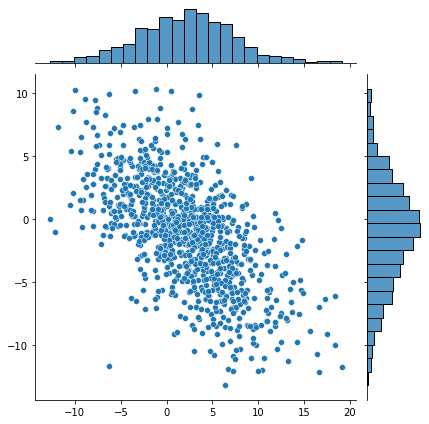

In [19]:
import seaborn as sns

sns.jointplot(x=sample[:, 0], y=sample[:, 1]);

**c1)** Define a random variable $Z = X + Y$. Draw a sample $(\bar{X}, \bar{Y})\sim\mathcal{N}(\boldsymbol\mu, \Sigma)$ of size $10^6$ and sum its $\bar{X}$ and $\bar{Y}$ coordinates to obtain a sample $\bar{Z}$.

In [20]:
sample_2 = multivariate_normal.rvs(mean=mu, cov=sigma, size=10**6)
sample_2

array([[-0.67202292,  0.76590739],
       [-1.1297213 ,  4.68813729],
       [-3.15017823,  1.1798207 ],
       ...,
       [-1.33198513, -2.80661789],
       [-0.63101763,  3.01579882],
       [ 2.2408779 , -2.74744086]])

In [21]:
Z = sample_2[:, 0] + sample_2[:, 1]
Z

array([ 0.09388447,  3.55841599, -1.97035753, ..., -4.13860302,
        2.38478119, -0.50656296])

**c2)** Using the sample mean and sample std of sample $\bar{Z}$ estimate the mean and std/variance for RV $Z$.

In [22]:
Z.mean()

1.000567735067261

In [23]:
Z.var(ddof=1)

17.017523019021514

**c3)** Draw a histogram from this sample. What's the distribution for RV $Z$?

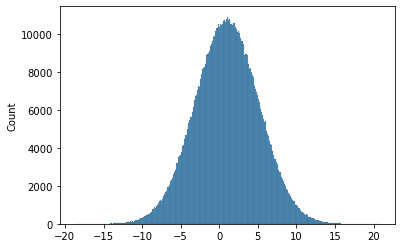

In [24]:
sns.histplot(Z);

In [25]:
print("It's normal distribution!")

It's normal distribution!


**05.** Let RV $\mathbf{X}$ be a point picked uniformly at random from the *unit square*, i.e. a 2D point $(x, y)$ where both its coordinates belong to the interval $[0, 1]$. This RV has a *Bivariate Uniform Distribution*, i.e. $\mathbf{X}\sim\mathcal{U}[0,1]^2.$

$$\$$

Using `rng.random()` with the appropriate value for `size` argument, draw a sample from $\mathcal{U}[0,1]^2$ of size 1000. Use `jointplot()` from Seaborn to display how the sample points are distributed in 2D space, along with histograms of marginal distributions.

In [26]:
rng = np.random.default_rng(seed=1023)

sample = rng.random(size=(1000, 2))
sample

array([[0.33886908, 0.90589874],
       [0.90960195, 0.74722338],
       [0.82310232, 0.26763656],
       ...,
       [0.64227992, 0.04629571],
       [0.8116009 , 0.70633791],
       [0.41200449, 0.4582459 ]])

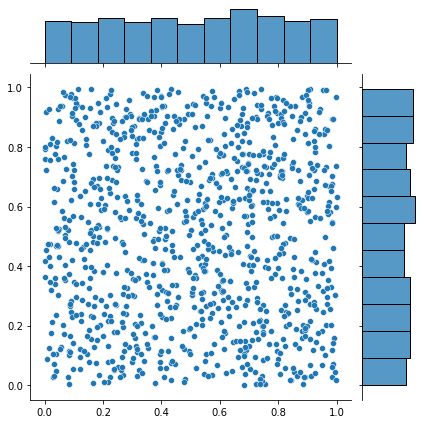

In [27]:
sns.jointplot(x=sample[:, 0], y=sample[:, 1]);

**06.** Let $X$ and $Y$ be two RVs with $X\sim\mathcal{E}(3)$ and $Y\sim\mathcal{N}(3, 1)$. 

$$\$$

**a)** Draw a sample of size 1000 for both RVs separately. 

In [28]:
sample_x = rng.exponential(scale=3, size=1000)

In [29]:
sample_y = rng.normal(loc=3, scale=1, size=1000)

**b)** Use `jointplot()` from Seaborn to display how the sample points of bivariate RV $(X, Y)$ are distributed in 2D space, along with histograms of marginal distributions.

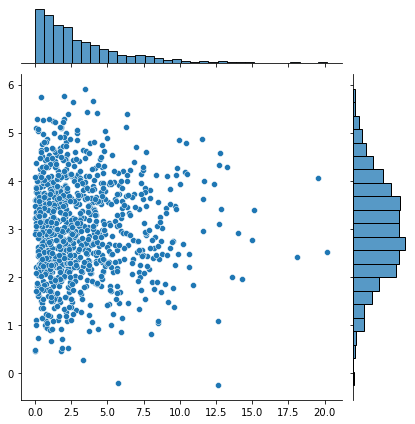

In [30]:
sns.jointplot(x=sample_x, y=sample_y);

**07.** You need to estimate a parameter $\theta$, and you only know that it's a value between 0 and 1. You just decide to pick a number uniformly at random from $[0, 1]$ interval as the estimate of this parameter $\hat{\theta}$. 

$$\$$ 

**a)** What should be the true value of parameter $\theta$ in order for your 'decision method' to be unbiased? Answer this question by drawing a (large enough) sample from $\mathcal{U}[0,1]$ and using the sample mean to approximate $E\hat{\theta}$.

In [31]:
sample = rng.random(size=10**6)
sample.mean()

0.5000331813895471

In [32]:
print('The true value of parameter should be 0.5 for our decision method to be unbiased.')

The true value of parameter should be 0.5 for our decision method to be unbiased.


**b)** What's the (approximate) variance of this 'decision method'? 

*Hint*: To compute $E(\hat{\theta} - E\hat{\theta})^2$ use $({\rm sample} - {\rm sample\ mean})^2$, and then find the mean of this result to approximate its expected value (and therefore the variance).

In [33]:
diff = (sample - sample.mean())**2
diff

array([0.00900192, 0.20522132, 0.00591562, ..., 0.11694058, 0.13704425,
       0.09450423])

In [34]:
diff.mean()

0.08325264830709218

In [35]:
print('Approximate variance of our decision method is 0.083.')

Approximate variance of our decision method is 0.083.


DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>